# problem statement-1

In [206]:
import re
import numpy as np
import pandas as pd
import seaborn as sns

In [207]:
ls


 Volume in drive C is ssd
 Volume Serial Number is 344C-651C

 Directory of C:\Users\phoneclicker\Downloads\excelr_kd\ASSIGNMENT\Text Mining

12/31/2022  11:11 AM    <DIR>          .
12/31/2022  11:11 AM    <DIR>          ..
12/30/2022  12:28 PM    <DIR>          .ipynb_checkpoints
11/29/2022  03:33 PM               211 Assignment.txt
11/29/2022  03:33 PM           170,848 Elon_musk.csv
11/29/2022  03:33 PM            46,299 negative-words.txt
11/29/2022  03:33 PM            20,630 positive-words.txt
11/29/2022  03:33 PM             4,158 stop.txt
12/31/2022  11:11 AM           143,273 Text_Mining.ipynb
               6 File(s)        385,419 bytes
               3 Dir(s)  23,648,694,272 bytes free


In [208]:
elon=pd.read_csv("Elon_musk.csv",encoding='cp1252')

# EDA

In [209]:
elon.head()

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!


In [210]:
elon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


# Pre-processing
Step 1 : Removing spaces and symbol

In [211]:
elon.Text=elon.Text.apply(lambda x: re.sub('[^a-zA-Z ]', "", x))

In [212]:
elon.Text

0                                                                                                                         kunalb Im an alien
1                                                               IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it
2                                                                                                           joerogan Spotify Great interview
3                                                                                                               gtera Doge is underestimated
4                                       teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more
                                                                        ...                                                                 
1994    flcnhvy True it sounds so surreal but the negative propaganda is still all out there amp easy to find in social me httpstcoWJRzIbKhH
1995         

In [213]:
re.sub('[^a-zA-Z ]', "", "I am cool you know $$$$ ;")

'I am cool you know  '

In [214]:
elon.head()

,Unnamed: 0,Text
0,1,kunalb Im an alien
1,2,IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it
2,3,joerogan Spotify Great interview
3,4,gtera Doge is underestimated
4,5,teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more


# Step - 2 : Make text to lower

In [215]:
elon.Text=elon.Text.apply(lambda x: x.lower())

In [216]:
elon.head()

,Unnamed: 0,Text
0,1,kunalb im an alien
1,2,idaacarmack ray tracing on cyberpunk with hdr is nextlevel have you tried it
2,3,joerogan spotify great interview
3,4,gtera doge is underestimated
4,5,teslacn congratulations tesla china for amazing execution last year now on to the next for even more


In [217]:
import nltk  
nltk.download('stopwords') 
from nltk.corpus import stopwords  
from nltk.stem.porter import PorterStemmer 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\phoneclicker\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [218]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\phoneclicker\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

# Step 3:- Splitting the words from line

In [219]:
elon.Text=elon.Text.apply(lambda x: x.split())

In [220]:
elon.head()

,Unnamed: 0,Text
0,1,"[kunalb, im, an, alien]"
1,2,"[idaacarmack, ray, tracing, on, cyberpunk, with, hdr, is, nextlevel, have, you, tried, it]"
2,3,"[joerogan, spotify, great, interview]"
3,4,"[gtera, doge, is, underestimated]"
4,5,"[teslacn, congratulations, tesla, china, for, amazing, execution, last, year, now, on, to, the, next, for, even, more]"


# Step 4 :- Removing Stopwords

In [221]:
elon.Text=elon.Text.apply(lambda x: [word  for word in x if word not in set(stopwords.words('english'))])

In [222]:
elon.head()

,Unnamed: 0,Text
0,1,"[kunalb, im, alien]"
1,2,"[idaacarmack, ray, tracing, cyberpunk, hdr, nextlevel, tried]"
2,3,"[joerogan, spotify, great, interview]"
3,4,"[gtera, doge, underestimated]"
4,5,"[teslacn, congratulations, tesla, china, amazing, execution, last, year, next, even]"


In [223]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

# Step 5:- Stemming

In [224]:
ps = PorterStemmer()  
elon.Text=elon.Text.apply(lambda x: [ps.stem(word) for word in x])

In [225]:
elon.Text.head()

0                                                         [kunalb, im, alien]
1                   [idaacarmack, ray, trace, cyberpunk, hdr, nextlevel, tri]
2                                       [joerogan, spotifi, great, interview]
3                                                   [gtera, doge, underestim]
4    [teslacn, congratul, tesla, china, amaz, execut, last, year, next, even]
Name: Text, dtype: object

# Step 6 :- Rejoining

In [226]:
elon.Text=elon.Text.apply(lambda x: " ".join(x))

In [227]:
elon.Text

0                                                                              kunalb im alien
1                                            idaacarmack ray trace cyberpunk hdr nextlevel tri
2                                                             joerogan spotifi great interview
3                                                                        gtera doge underestim
4                                teslacn congratul tesla china amaz execut last year next even
                                                 ...                                          
1994    flcnhvi true sound surreal neg propaganda still amp easi find social httpstcowjrzibkhh
1995                                    ppathol make sure read ur term amp condit click accept
1996                                                            teslagong ppathol samwis gamge
1997                                                            ppathol altho dumb dumber ufuf
1998                                              

# Sentiment Analysis

In [228]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.


In [229]:
from textblob import TextBlob
elon['sentiment'] = elon['Text'].apply(lambda x:TextBlob(x).sentiment[0] )
elon[['Text','sentiment']].head()
# TextBlob(x).sentiment[1] = sentiment[1]= negative and positive [0], only positive=[1]

,Text,sentiment
0,kunalb im alien,-0.25
1,idaacarmack ray trace cyberpunk hdr nextlevel tri,0.00
2,joerogan spotifi great interview,0.80
3,gtera doge underestim,0.00
4,teslacn congratul tesla china amaz execut last year next even,0.00


In [230]:
elon.sentiment

0      -0.250000
1       0.000000
2       0.800000
3       0.000000
4       0.000000
          ...   
1994    0.186667
1995    0.500000
1996    0.000000
1997   -0.375000
1998    0.000000
Name: sentiment, Length: 1999, dtype: float64

# problem statement -2

In [231]:
import requests
from bs4 import BeautifulSoup

# Scraping reviews using BeautifulSoup

In [1]:
link="https://www.amazon.in/Patanjali-Honey-1kg/product-reviews/B01C8QIBJ0/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"

In [2]:

review_list=[]

for k in range(0,6):
    review_link=link+'&pageNumber='+str(k)
    print(review_link)
    page=requests.get(review_link)
    soup=BeautifulSoup(page.content,'html.parser')
    reviews=soup.find_all('span',class_='review-text-content')
    
    for i in range(0,len(reviews)):
        
        review_list.append(reviews[i].get_text().strip())
        

https://www.instagram.com/isha.foundation/&pageNumber=0


NameError: name 'requests' is not defined

In [234]:
review_list

['Using this product from last 5 years, no complaint, brand value and long using experience  gives confidence of no adulteration.',
 'Good one',
 "It's good ...no sugar deposits found as in few other honey...I think it's good.",
 'Thanks',
 'Good',
 'Very nice product',
 'Satisfied.',
 "I don't know where from these honey producers are churning out honey in industrial quantity. I have tasted the village honey. This honey is certainly not like the original. It is being sold and purchased due to Patanjali brand name else it is not pure honey.",
 'Corrugated Box kharab ho chuka tha but thik hai',
 'Quality assurance',
 'The honey came in a sturdy plastic bottle, It is clear, and tastes mild and good but without the special flavour  that comes from the type of flowers the bees have ben collecting from. The bottle does not state that it is natural honey - rather it is manufactured and supposed to be best before 12 months from date of manufacture, so there is some doubt about its natural pur

In [235]:
len(review_list)

40

In [236]:
df=pd.DataFrame({'Reviews':review_list})
pd.set_option('max_colwidth', 800)
df

,Reviews
0,"Using this product from last 5 years, no complaint, brand value and long using experience gives confidence of no adulteration."
1,Good one
2,It's good ...no sugar deposits found as in few other honey...I think it's good.
3,Thanks
4,Good
5,Very nice product
6,Satisfied.
7,I don't know where from these honey producers are churning out honey in industrial quantity. I have tasted the village honey. This honey is certainly not like the original. It is being sold and purchased due to Patanjali brand name else it is not pure honey.
8,Corrugated Box kharab ho chuka tha but thik hai
9,Quality assurance


# Pre-processing

In [239]:
df.Reviews=df.Reviews.apply(lambda x: re.sub('[^a-zA-Z ]', "", x))

In [240]:
df.head()

,Reviews
0,Using this product from last years no complaint brand value and long using experience gives confidence of no adulteration
1,Good one
2,Its good no sugar deposits found as in few other honeyI think its good
3,Thanks
4,Good


# Step - 2 : Make text to lower

In [241]:
df.Reviews=df.Reviews.apply(lambda x: x.lower())

In [242]:
df.head()

,Reviews
0,using this product from last years no complaint brand value and long using experience gives confidence of no adulteration
1,good one
2,its good no sugar deposits found as in few other honeyi think its good
3,thanks
4,good


# import stopwords and stemmer

In [243]:
import nltk  
nltk.download('stopwords') 
from nltk.corpus import stopwords  
from nltk.stem.porter import PorterStemmer 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\phoneclicker\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


# splitting word from line

In [244]:
df.Reviews=df.Reviews.apply(lambda x: x.split())

In [245]:
df.head()

,Reviews
0,"[using, this, product, from, last, years, no, complaint, brand, value, and, long, using, experience, gives, confidence, of, no, adulteration]"
1,"[good, one]"
2,"[its, good, no, sugar, deposits, found, as, in, few, other, honeyi, think, its, good]"
3,[thanks]
4,[good]


# removing stop words

In [246]:
df.Reviews=df.Reviews.apply(lambda x: [word  for word in x if word not in set(stopwords.words('english'))])

In [247]:
df.head()

,Reviews
0,"[using, product, last, years, complaint, brand, value, long, using, experience, gives, confidence, adulteration]"
1,"[good, one]"
2,"[good, sugar, deposits, found, honeyi, think, good]"
3,[thanks]
4,[good]


# stemming

In [248]:
ps = PorterStemmer()  
df.Reviews=df.Reviews.apply(lambda x: [ps.stem(word) for word in x])

In [249]:
df.head()

,Reviews
0,"[use, product, last, year, complaint, brand, valu, long, use, experi, give, confid, adulter]"
1,"[good, one]"
2,"[good, sugar, deposit, found, honeyi, think, good]"
3,[thank]
4,[good]


# rejoining

In [250]:
df.Reviews=df.Reviews.apply(lambda x: " ".join(x))

In [251]:
df.head()

,Reviews
0,use product last year complaint brand valu long use experi give confid adulter
1,good one
2,good sugar deposit found honeyi think good
3,thank
4,good


# Sentiment Analysis

# vader

In [252]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\phoneclicker\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [253]:
from nltk.sentiment import SentimentIntensityAnalyzer
si = SentimentIntensityAnalyzer()

In [254]:
def sentiment_score(text):
    score=si.polarity_scores(text)
    return score['compound']

In [255]:
df['sentiment_score'] = df['Reviews'].apply(lambda x:sentiment_score(x))


In [256]:
pd.set_option('max_colwidth', 500)
df.head()

,Reviews,sentiment_score
0,use product last year complaint brand valu long use experi give confid adulter,-0.2960
1,good one,0.4404
2,good sugar deposit found honeyi think good,0.7003
3,thank,0.3612
4,good,0.4404


In [267]:
def sentiment_category(score1):
    if(score1 > 0.4):
        return 'Positive'
    elif(score1 < .1):
        return 'Negative'
    else:
        return 'Neutral'

In [268]:
df['sentiment'] = df['sentiment_score'].apply(lambda x:sentiment_category(x))


In [269]:
df

,Reviews,sentiment_score,sentiment
0,use product last year complaint brand valu long use experi give confid adulter,-0.2960,Negative
1,good one,0.4404,Positive
2,good sugar deposit found honeyi think good,0.7003,Positive
3,thank,0.3612,Neutral
4,good,0.4404,Positive
5,nice product,0.4215,Positive
6,satisfi,0.0000,Negative
7,dont know honey produc churn honey industri quantiti tast villag honey honey certainli like origin sold purchas due patanjali brand name els pure honey,0.3612,Neutral
8,corrug box kharab ho chuka tha thik hai,0.0000,Negative
9,qualiti assur,0.0000,Negative


<AxesSubplot:xlabel='sentiment', ylabel='count'>

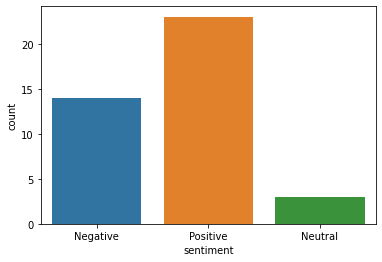

In [270]:
sns.countplot(x=df['sentiment'])